# Yahoo Finance (Python)

In this project we,

- use Yahoo Finance API to download stock data
- investigate and clean the dataset
- visualise the shape of the data

- https://pypi.org/project/yfinance/

In [45]:
# Libraries
import math
import numpy as np
import pandas as pd

import re

import requests as rq
import json

import yfinance as yf

import matplotlib.pyplot as plt

from bs4 import BeautifulSoup as bs
from xml.etree import ElementTree as et

from skimpy import clean_columns

## Investigate and clean the dataset

In [31]:
# Obtain the data
nvidia = yf.Ticker("NVDA")
nvidia

yfinance.Ticker object <NVDA>

In [32]:
# Write the file
with open("nvidia.json", "w", encoding="utf-8") as f:
    json.dump(nvidia.info, f, indent=2, ensure_ascii=False)

In [33]:
# Read the local file
with open("nvidia.json", "r", encoding="utf-8") as f:
    nvidia_info = json.load(f)

nvidia_info

{'address1': '2788 San Tomas Expressway',
 'city': 'Santa Clara',
 'state': 'CA',
 'zip': '95051',
 'country': 'United States',
 'phone': '408 486 2000',
 'website': 'https://www.nvidia.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "NVIDIA Corporation, a computing infrastructure company, provides graphics and compute and networking solutions in the United States, Singapore, Taiwan, China, Hong Kong, and internationally. The Compute & Networking segment includes its Data Centre accelerated computing platforms and artificial intelligence solutions and software; networking; automotive platforms and autonomous and electric vehicle solutions; Jetson for robotics and other embedded platforms; and DGX Cloud computing services. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and 

In [34]:
# Extract the history
nvidia_df = nvidia.history(period="max")
nvidia_df = nvidia_df.reset_index()
nvidia_df = clean_columns(nvidia_df)

In [35]:
nvidia_df.head()

,date,open,high,low,close,volume,dividends,stock_splits
0,1999-01-22 00:00:00-05:00,0.040112,0.044767,0.035575,0.037605,2714688000,0.0,0.0
1,1999-01-25 00:00:00-05:00,0.040589,0.042021,0.037605,0.041545,510480000,0.0,0.0
2,1999-01-26 00:00:00-05:00,0.042021,0.042857,0.037724,0.038321,343200000,0.0,0.0
3,1999-01-27 00:00:00-05:00,0.038440,0.039395,0.036291,0.038202,244368000,0.0,0.0
4,1999-01-28 00:00:00-05:00,0.038202,0.038440,0.037843,0.038082,227520000,0.0,0.0


In [36]:
nvidia_df.tail()

,date,open,high,low,close,volume,dividends,stock_splits
6781,2026-01-07 00:00:00-05:00,188.570007,191.369995,186.559998,189.110001,153543200,0.0,0.0
6782,2026-01-08 00:00:00-05:00,189.110001,189.550003,183.710007,185.039993,172457000,0.0,0.0
6783,2026-01-09 00:00:00-05:00,185.080002,186.339996,183.669998,184.860001,131327500,0.0,0.0
6784,2026-01-12 00:00:00-05:00,183.220001,187.119995,183.020004,184.940002,137624700,0.0,0.0
6785,2026-01-13 00:00:00-05:00,183.190002,185.139999,183.631302,184.134995,16384249,0.0,0.0


In [37]:
# Check NaNs
print([f"{c}: {nvidia_df[c].isna().sum()}" for c in nvidia_df.columns])

['date: 0', 'open: 0', 'high: 0', 'low: 0', 'close: 0', 'volume: 0', 'dividends: 0', 'stock_splits: 0']


In [ ]:
# Check dividends and splits
print([f"{c}: {sum(nvidia_df[c] != 0)}" for c in ("dividends", "stock_splits")])

['dividends: 53', 'stock_splits: 6']


In [43]:
nvidia_df[(nvidia_df["dividends"] != 0) | (nvidia_df["stock_splits"] != 0)]

,date,open,high,low,close,volume,dividends,stock_splits
361,2000-06-27 00:00:00-04:00,0.314206,0.319460,0.263828,0.272185,604608000,0.000000,2.0
664,2001-09-10 00:00:00-04:00,0.295526,0.300073,0.283416,0.289414,1872360000,0.000000,2.0
1813,2006-04-07 00:00:00-04:00,0.465752,0.469878,0.457347,0.466516,682674000,0.000000,2.0
2171,2007-09-11 00:00:00-04:00,0.785498,0.798563,0.777246,0.792603,405424000,0.000000,1.5
3480,2012-11-20 00:00:00-05:00,0.267136,0.268289,0.262291,0.265060,336976000,0.001875,0.0
3545,2013-02-26 00:00:00-05:00,0.284326,0.288736,0.283397,0.287111,487504000,0.001875,0.0
3604,2013-05-21 00:00:00-04:00,0.346423,0.349456,0.342457,0.348056,357784000,0.001875,0.0
3667,2013-08-20 00:00:00-04:00,0.348639,0.352859,0.348170,0.350514,234192000,0.001875,0.0
3731,2013-11-19 00:00:00-05:00,0.368207,0.371507,0.363492,0.363963,206716000,0.002125,0.0
3796,2014-02-25 00:00:00-05:00,0.445169,0.447063,0.439012,0.443748,242184000,0.002125,0.0


In [38]:
# Check the date
print("The first and the last date of the series:\n", (min(nvidia_df.date), max(nvidia_df.date)))

The first and the last date of the series:
 (Timestamp('1999-01-22 00:00:00-0500', tz='America/New_York'), Timestamp('2026-01-13 00:00:00-0500', tz='America/New_York'))


## The shape of the price at close

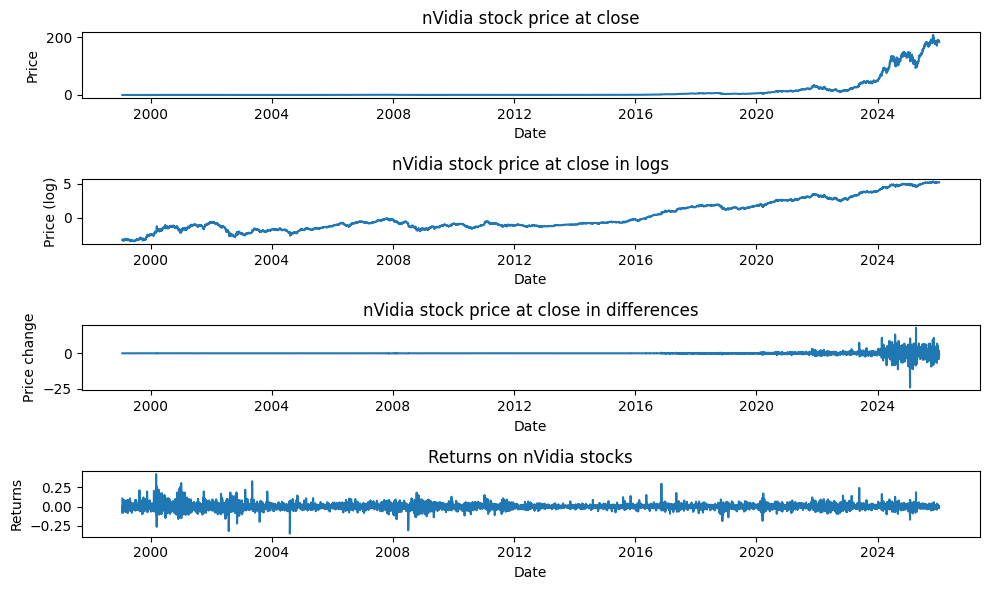

In [52]:
# Plot the price at close
plt.figure(figsize = (10, 6))

plt.subplot(411)
plt.plot(nvidia_df.date, nvidia_df.close)

plt.title("nVidia stock price at close")
plt.xlabel("Date")
plt.ylabel("Price")

plt.subplot(412)
plt.plot(nvidia_df.date, np.log(nvidia_df.close))

plt.title("nVidia stock price at close in logs")
plt.xlabel("Date")
plt.ylabel("Price (log)")

plt.subplot(413)
plt.plot(nvidia_df.date, nvidia_df.close - nvidia_df.close.shift(1))

plt.title("nVidia stock price at close in differences")
plt.xlabel("Date")
plt.ylabel("Price change")

plt.subplot(414)
plt.plot(nvidia_df.date, (nvidia_df.close - nvidia_df.close.shift(1)) / nvidia_df.close.shift(1))

plt.title("Returns on nVidia stocks")
plt.xlabel("Date")
plt.ylabel("Returns")

plt.tight_layout()
plt.show()

## Unit root and integration

In [ ]:
#